In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [82]:
# Read the CSV file into a dataframe, skipping the first 3 rows
emission = pd.read_csv('../data/Emissions_to_air_on_Dutch_territory__road_traffic_03072024_225625.csv', sep=';', skiprows=3)

# Rename columns 'Unnamed: 0' and 'Unnamed: 1' to 'Means of transport' and 'Period', respectively
emission.rename(columns={'Unnamed: 0': 'Means of transport', 'Unnamed: 1': 'Period'}, inplace=True)

# Drop the first row after renaming, assuming it contains headers from a previous layout
emission.drop(emission.index[0], inplace=True)

# Drop the last row, assuming it contains footer information
emission.drop(emission.tail(1).index, inplace=True)

# Reset the index after dropping rows
emission = emission.reset_index(drop=True)

# Get all columns that start with 'Fleet'
fleet_columns = [col for col in emission.columns if col.startswith('Fleet')]

# Drop these columns from the dataframe
emission.drop(columns=fleet_columns, inplace=True)

# Remove the asterisk from the Period column
emission['Period'] = emission['Period'].str.rstrip('*')

# Convert Period column to numeric type for comparison
emission['Period'] = pd.to_numeric(emission['Period'])

# Select rows where Period is between 2017 and 2020 (inclusive)
emission = emission[(emission['Period'] >= 2017) & (emission['Period'] <= 2020)]

# Function to extract text after '|'
def extract_name(column_name):
    return column_name.split('|')[1]

# Identify emissions-related columns excluding 'Period' and 'Means of transport'
emissions_columns = [col for col in emission.columns if col.startswith('Emissions') and col not in ['Period', 'Means of transport']]

# Rename only emissions-related columns
emission.rename(columns={col: extract_name(col) for col in emissions_columns}, inplace=True)


emission

,Means of transport,Period,Carbon dioxide (CO2),Dinitrogen oxide (N2O),Methane (CH4),Carbon monoxide (CO),NMVOC,Nitrogen oxides (NOx),Soot,PM10 Total (Particulate matter),PM10 Combustion (Particulate matter),PM10 Wear (Particulate matter),PM2.5 Total (Particulate matter),PM2.5 Combustion (Particulate matter),PM2.5 Wear (Particulate matter),Ammonia (NH3),Sulphur dioxide (SO2)
0,Total motor vehicles,2017,28384,1.18,2.34,228.86,23.75,78.76,0.76,4.03,1.30,2.72,1.76,1.30,0.45,3.64,0.19
1,Total motor vehicles,2018,28657,1.20,2.35,229.83,23.59,78.18,0.74,4.02,1.26,2.76,1.72,1.26,0.46,3.70,0.19
2,Total motor vehicles,2019,28526,1.23,2.32,213.76,23.24,72.44,0.62,3.88,1.10,2.79,1.56,1.10,0.47,3.65,0.19
3,Total motor vehicles,2020,25374,1.14,2.02,181.29,21.04,59.15,0.48,3.38,0.89,2.49,1.30,0.89,0.42,3.31,0.17
6,Passenger cars,2017,17341,0.71,1.62,183.27,12.02,28.27,0.23,2.24,0.46,1.77,0.76,0.46,0.29,3.16,0.11
7,Passenger cars,2018,17489,0.73,1.64,185.69,12.18,28.56,0.22,2.24,0.45,1.80,0.75,0.45,0.30,3.20,0.12
8,Passenger cars,2019,17236,0.75,1.60,172.56,11.95,26.51,0.18,2.19,0.38,1.81,0.68,0.38,0.30,3.09,0.12
9,Passenger cars,2020,14315,0.66,1.34,143.87,10.14,19.41,0.12,1.80,0.28,1.52,0.54,0.28,0.25,2.67,0.10
12,Motorcycles,2017,268,0.00,0.09,21.13,2.17,0.86,0.01,0.05,0.04,0.02,0.04,0.04,0.00,0.00,0.00
13,Motorcycles,2018,267,0.00,0.09,19.78,2.04,0.82,0.01,0.05,0.04,0.02,0.04,0.04,0.00,0.00,0.00


Find top 5 emission type

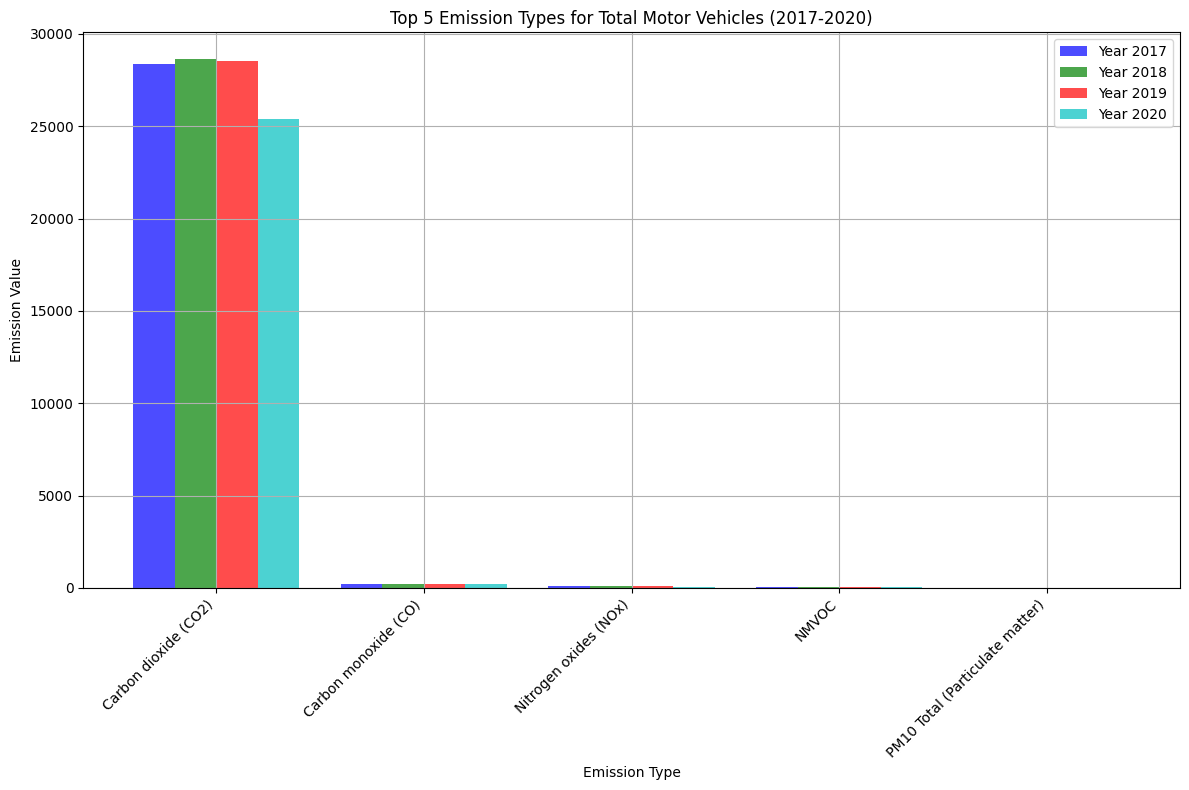

In [120]:
# Convert numeric columns to float
numeric_columns = emission.columns.drop(['Means of transport', 'Period'])
emission[numeric_columns] = emission[numeric_columns].apply(pd.to_numeric)

# Filter rows for 'Total motor vehicles'
total_motor_vehicles = emission[emission['Means of transport'] == 'Total motor vehicles']

# Iterate over unique years and find top 5 emissions
years = total_motor_vehicles['Period'].unique()
top_5_emissions = pd.DataFrame()

for year in years:
    year_data = total_motor_vehicles[total_motor_vehicles['Period'] == year]
    # Sort by emissions for the current year
    sorted_year_data = year_data.drop(['Means of transport', 'Period'], axis=1).iloc[0].sort_values(ascending=False)
    # Select top 5 emissions
    top_5_emissions_for_year = sorted_year_data.head(5)
    # Append to results dataframe
    top_5_emissions = pd.concat([top_5_emissions, top_5_emissions_for_year], axis=1)

# Rename columns in the result dataframe
top_5_emissions.columns = years
#top_5_emissions

# Plotting combined histograms
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
index = np.arange(len(top_5_emissions.index))
colors = ['b', 'g', 'r', 'c']

for i, year in enumerate(years):
    ax.bar(index + i * bar_width, top_5_emissions[year], bar_width, label=f'Year {year}', color=colors[i], alpha=0.7)

ax.set_xlabel('Emission Type')
ax.set_ylabel('Emission Value')
ax.set_title('Top 5 Emission Types for Total Motor Vehicles (2017-2020)')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(top_5_emissions.index, rotation=45, ha='right')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

Which vehicle type produces the highest amout of CO2

In [125]:
# Convert 'Period' column to numeric if it's not already
emission['Period'] = pd.to_numeric(emission['Period'])

# Filter data for years 2017 to 2020
filtered_data = emission[(emission['Means of transport'] != 'Total motor vehicles')]

# Group by 'Period' and find top 3 means of transport by CO2 emissions
top_3_by_year = filtered_data.groupby('Period').apply(lambda x: x.nlargest(3, 'Carbon dioxide (CO2)')).reset_index(drop=True)

# Display the results
print(top_3_by_year[['Period', 'Means of transport', 'Carbon dioxide (CO2)']])



    Period                      Means of transport  Carbon dioxide (CO2)
0     2017                          Passenger cars                 17341
1     2017  Heavy weight commercial motor vehicles                  6542
2     2017  Light weight commercial motor vehicles                  3626
3     2018                          Passenger cars                 17489
4     2018  Heavy weight commercial motor vehicles                  6559
5     2018  Light weight commercial motor vehicles                  3739
6     2019                          Passenger cars                 17236
7     2019  Heavy weight commercial motor vehicles                  6614
8     2019  Light weight commercial motor vehicles                  3836
9     2020                          Passenger cars                 14315
10    2020  Heavy weight commercial motor vehicles                  6608
11    2020  Light weight commercial motor vehicles                  3727


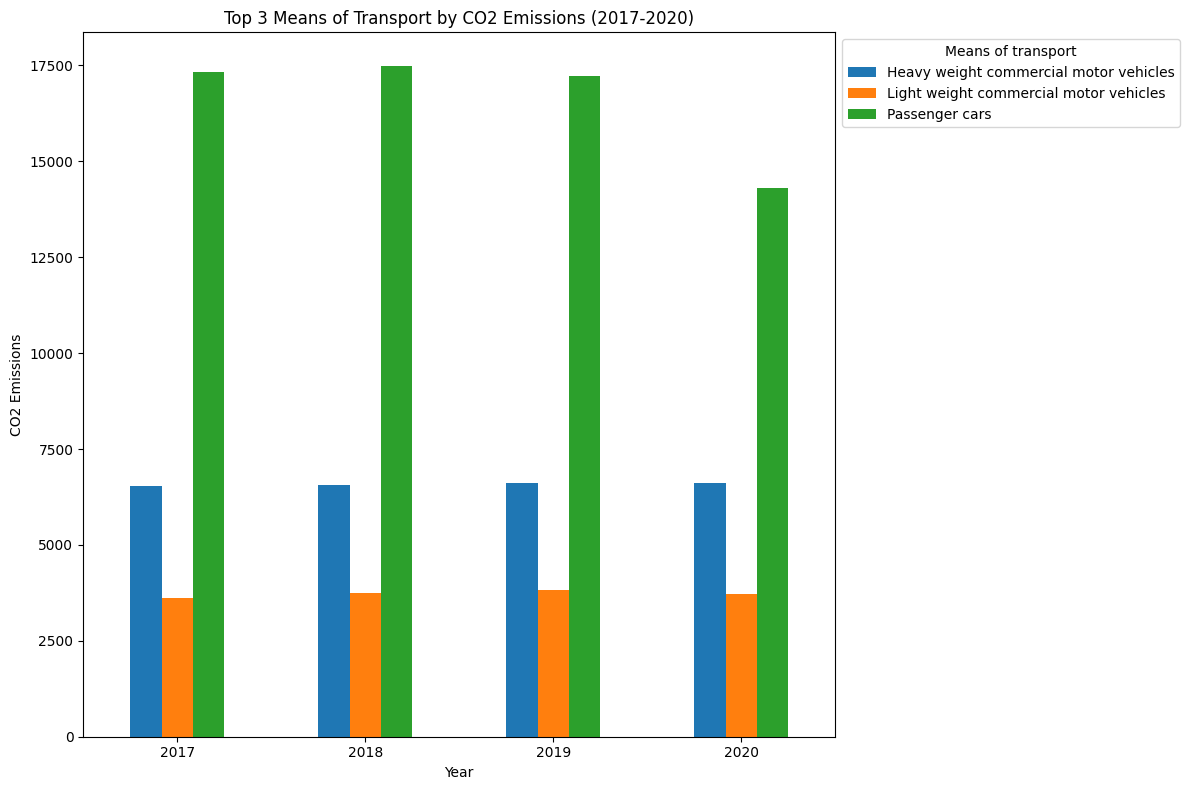

In [127]:
# Pivot the data for plotting
pivot_data = top_3_by_year.pivot(index='Period', columns='Means of transport', values='Carbon dioxide (CO2)')

# Plotting
pivot_data.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Top 3 Means of Transport by CO2 Emissions (2017-2020)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=0)
plt.legend(title='Means of transport', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [152]:
# Read the CSV file into a dataframe, skipping the first 3 rows
vehicle = pd.read_csv('../data/Vehicle_kilometres_goods_vehicles__kilometres__vehicle_weight_2001_2020_03072024_225645.csv', sep=';', skiprows=3)

# Rename columns 'Unnamed: 0' and 'Unnamed: 1' to 'Period' and 'Means of transport', respectively
vehicle.rename(columns={'Unnamed: 0': 'Period', 'Unnamed: 1': 'Means of transport'}, inplace=True)

# Drop the first row after renaming, assuming it contains headers from a previous layout
vehicle.drop(vehicle.index[0], inplace=True)

# Drop the last row, assuming it contains footer information
vehicle.drop(vehicle.tail(1).index, inplace=True)

# Remove the asterisk from the Period column
vehicle['Period'] = vehicle['Period'].str.rstrip('*')

# Convert Period column to numeric type for comparison
columns_to_convert = vehicle.columns.difference(['Means of transport'])
vehicle[columns_to_convert] = vehicle[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Select rows where Period is between 2017 and 2020 (inclusive)
vehicle = vehicle[(vehicle['Period'] >= 2017) & (vehicle['Period'] <= 2020)]

# Reset the index after filtering
vehicle = vehicle.reset_index(drop=True)


vehicle

,Period,Means of transport,Kilometres in the Netherlands|Total kilometres in the Netherlands,Kilometres in the Netherlands|Kilometres by Dutch vehicles,Kilometres in the Netherlands|Kilometres by foreign vehicles,Kilometres by Dutch vehicles|Total kilometres by Dutch vehicles,Kilometres by Dutch vehicles|Kilometres in the Netherlands,Kilometres by Dutch vehicles|Kilometres abroad,Average annual kilometres|Total average annual kilometres,Average annual kilometres|Average annual kilometres in Netherlands,Average annual kilometres|Average annual kilometres abroad,Dutch goods vehicles in use
0,2017,Lorries and road tractors,7450.9,6568.4,882.5,9442.9,6568.4,2874.5,58367,40599,17767,161786
1,2017,Road tractor,5199.9,4455.3,744.6,6880.8,4455.3,2425.5,75874,49128,26746,90687
2,2017,Lorry (road tractor not included),2251.0,2113.2,137.8,2562.1,2113.2,449.0,36036,29721,6314,71099
3,2017,To 10 000 kg,193.0,187.9,5.0,204.3,187.9,16.4,15255,14033,1221,13393
4,2017,10 000 to 20 000 kg,902.2,868.6,33.5,977.9,868.6,109.3,32206,28607,3599,30364
5,2017,20 000 kg or more,1155.9,1056.6,99.3,1379.9,1056.6,323.3,50468,38643,11825,27343
6,2018,Lorries and road tractors,7469.7,6581.7,887.9,9521.6,6581.7,2939.8,57287,39599,17688,166209
7,2018,Road tractor,5264.7,4522.9,741.8,6979.1,4522.9,2456.2,73863,47868,25995,94487
8,2018,Lorry (road tractor not included),2204.9,2058.8,146.1,2542.5,2058.8,483.6,35449,28706,6743,71722
9,2018,To 10 000 kg,187.4,183.7,3.7,196.0,183.7,12.3,14997,14055,942,13072


Number of Light and Heavy vehicle in use from 2017 to 2020

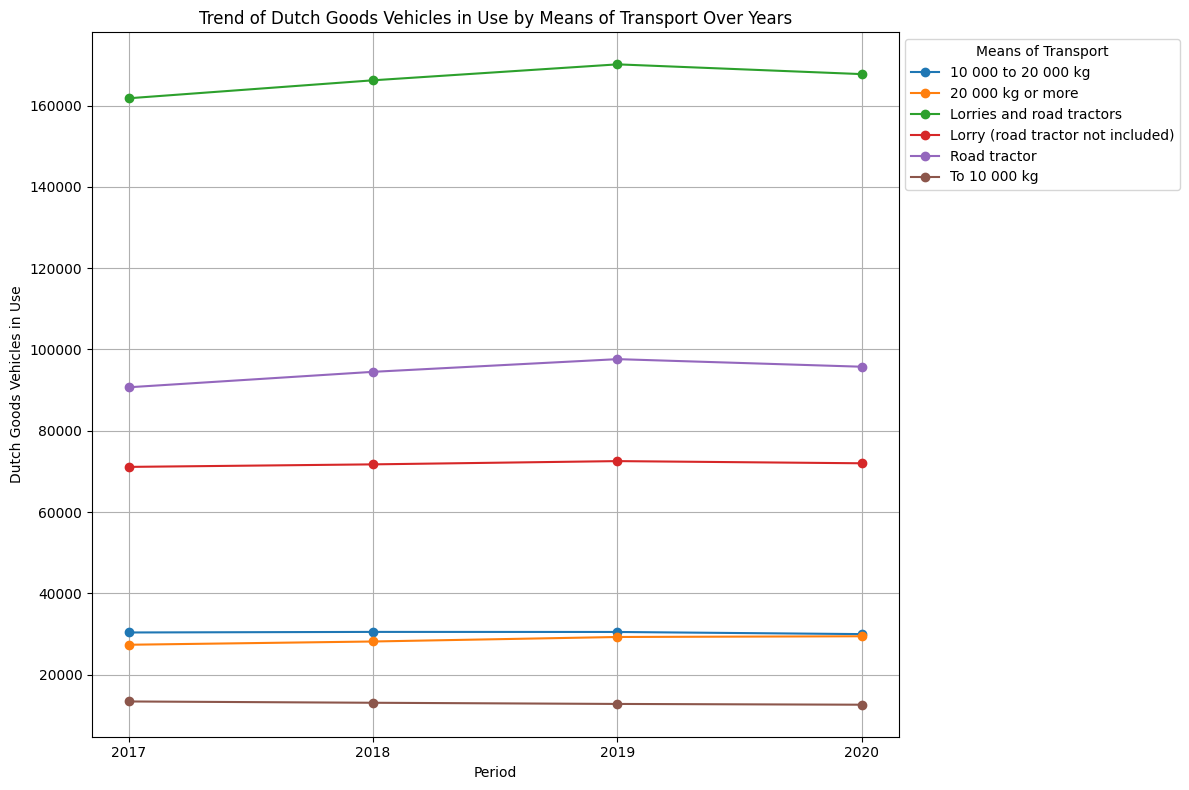

In [153]:
# Pivot the dataframe to have 'Means of transport' as index, 'Period' as columns, and 'Dutch goods vehicles in use' as values
df_pivot = vehicle.pivot(index='Means of transport', columns='Period', values='Dutch goods vehicles in use')

# Plotting the line chart
plt.figure(figsize=(12, 8))

# Iterate over each means of transport and plot a line for it
for transport in df_pivot.index:
    plt.plot(df_pivot.columns, df_pivot.loc[transport], marker='o', linestyle='-', label=transport)

plt.title('Trend of Dutch Goods Vehicles in Use by Means of Transport Over Years')
plt.xlabel('Period')
plt.ylabel('Dutch Goods Vehicles in Use')
plt.legend(title='Means of Transport', bbox_to_anchor=(1, 1))
plt.grid(True)

# Set the x-axis ticks to display only sharp year values
plt.xticks(df_pivot.columns)

plt.tight_layout()
plt.show()

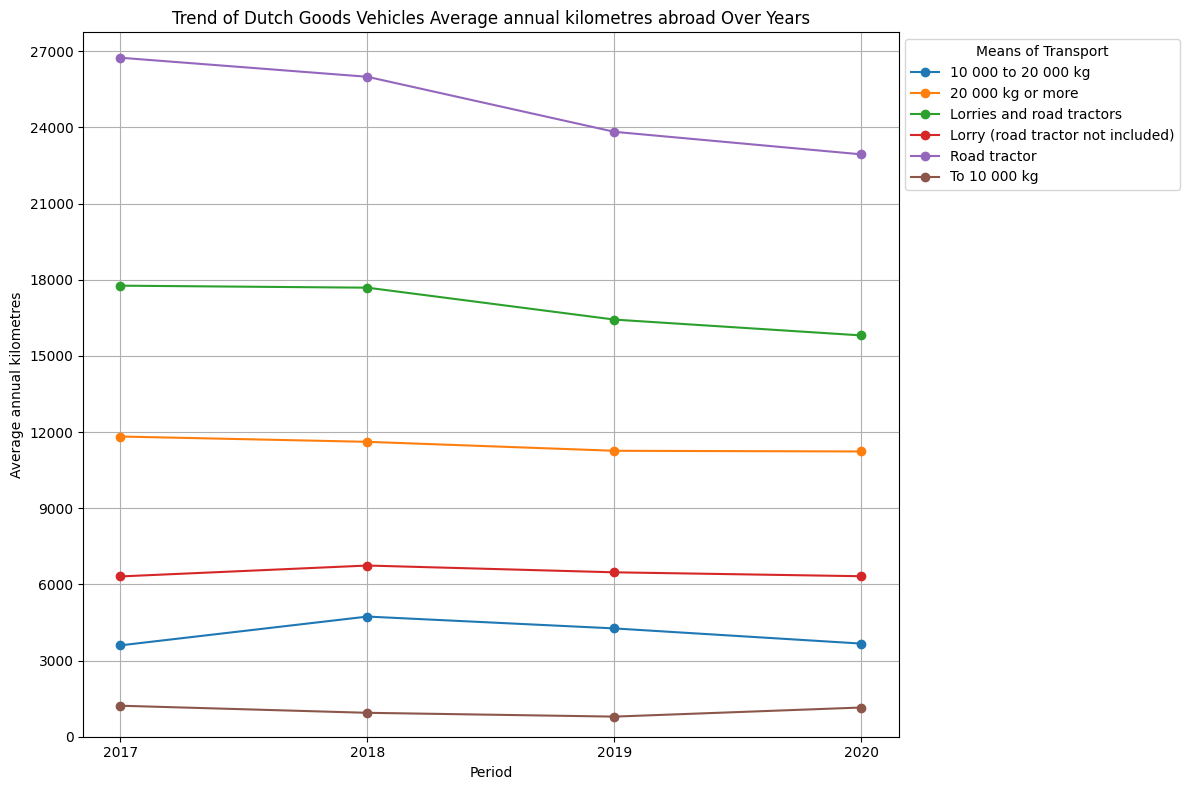

In [151]:
vehicle['Average annual kilometres|Average annual kilometres abroad'] = pd.to_numeric(vehicle['Average annual kilometres|Average annual kilometres abroad'], errors='coerce')

# Pivot the dataframe to have 'Means of transport' as index, 'Period' as columns, and 'Dutch goods vehicles in use' as values
df_pivot = vehicle.pivot(index='Means of transport', columns='Period', values='Average annual kilometres|Average annual kilometres abroad')

# Plotting the line chart
plt.figure(figsize=(12, 8))

# Iterate over each means of transport and plot a line for it
for transport in df_pivot.index:
    plt.plot(df_pivot.columns, df_pivot.loc[transport], marker='o', linestyle='-', label=transport)

plt.title('Trend of Dutch Goods Vehicles Average annual kilometres abroad Over Years')
plt.xlabel('Period')
plt.ylabel('Average annual kilometres')
plt.legend(title='Means of Transport', bbox_to_anchor=(1, 1))
plt.grid(True)

# Set the x-axis ticks to display only sharp year values
plt.xticks(df_pivot.columns)

# Ensure y-axis has evenly spaced ticks with MaxNLocator
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set y-axis limits to be close to the actual data range, but with a bit of padding
plt.ylim(0, df_pivot.values.max() + 1000)

plt.tight_layout()
plt.show()

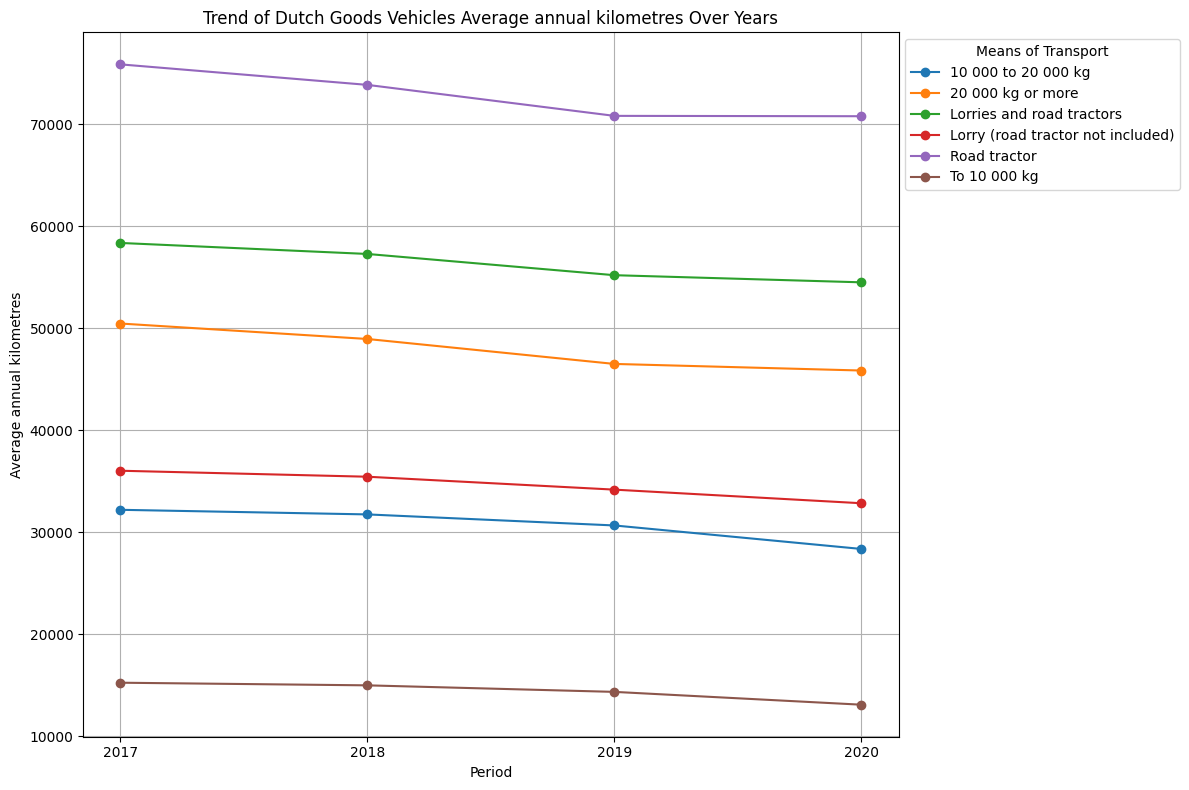

In [154]:
# Pivot the dataframe to have 'Means of transport' as index, 'Period' as columns, and 'Dutch goods vehicles in use' as values
df_pivot = vehicle.pivot(index='Means of transport', columns='Period', values='Average annual kilometres|Total average annual kilometres')

# Plotting the line chart
plt.figure(figsize=(12, 8))

# Iterate over each means of transport and plot a line for it
for transport in df_pivot.index:
    plt.plot(df_pivot.columns, df_pivot.loc[transport], marker='o', linestyle='-', label=transport)

plt.title('Trend of Dutch Goods Vehicles Average annual kilometres Over Years')
plt.xlabel('Period')
plt.ylabel('Average annual kilometres')
plt.legend(title='Means of Transport', bbox_to_anchor=(1, 1))
plt.grid(True)

# Set the x-axis ticks to display only sharp year values
plt.xticks(df_pivot.columns)

plt.tight_layout()
plt.show()

Which vehicle has the highest Kilometres in the Netherlands

In [135]:
# Convert 'Kilometres in the Netherlands|Total kilometres in the Netherlands' to numeric if it's not already
vehicle['Kilometres in the Netherlands|Total kilometres in the Netherlands'] = pd.to_numeric(vehicle['Kilometres in the Netherlands|Total kilometres in the Netherlands'], errors='coerce')

# Group by 'Period' and find the row with maximum 'Kilometres in the Netherlands|Total kilometres in the Netherlands'
max_km_rows = vehicle.loc[vehicle.groupby('Period')['Kilometres in the Netherlands|Total kilometres in the Netherlands'].idxmax()]

# Extract relevant columns (Period and Means of transport)
result = max_km_rows[['Period', 'Means of transport', 'Kilometres in the Netherlands|Total kilometres in the Netherlands']]

result

,Period,Means of transport,Kilometres in the Netherlands|Total kilometres in the Netherlands
0,2017,Lorries and road tractors,7450.9
6,2018,Lorries and road tractors,7469.7
12,2019,Lorries and road tractors,7503.4
18,2020,Lorries and road tractors,7436.7


In [136]:
# Convert 'Kilometres in the Netherlands|Total kilometres in the Netherlands' to numeric if it's not already
vehicle['Average annual kilometres|Total average annual kilometres'] = pd.to_numeric(vehicle['Average annual kilometres|Total average annual kilometres'], errors='coerce')

# Group by 'Period' and find the row with maximum 'Kilometres in the Netherlands|Total kilometres in the Netherlands'
max_km_rows = vehicle.loc[vehicle.groupby('Period')['Average annual kilometres|Total average annual kilometres'].idxmax()]

# Extract relevant columns (Period and Means of transport)
result = max_km_rows[['Period', 'Means of transport', 'Average annual kilometres|Total average annual kilometres']]

result

,Period,Means of transport,Average annual kilometres|Total average annual kilometres
1,2017,Road tractor,75874
7,2018,Road tractor,73863
13,2019,Road tractor,70824
19,2020,Road tractor,70789
